### **Lets Grow More**
### **Data Science Internship(JAN-2023)**
### [Task: Iris Flowers Classification](https://www.canva.com/design/DAEjrwWV35w/-gxHUkJMO1Zr4pYVVpOYcg/view?utm_content=DAEjrwWV35w&utm_campaign=designshare&utm_medium=link&utm_source=sharebutton#1)
### Aman Gupta

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df = sns.load_dataset("iris")

In [3]:
# Checking the dataset
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
133,6.3,2.8,5.1,1.5,virginica
85,6.0,3.4,4.5,1.6,versicolor
72,6.3,2.5,4.9,1.5,versicolor
143,6.8,3.2,5.9,2.3,virginica
0,5.1,3.5,1.4,0.2,setosa


In [4]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Number of unique items in the dataset
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [6]:
#Unique Species items
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#Some statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
# Checking the missing values
df.isna().mean()

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [9]:
# Checking for duplicate values
df.duplicated().sum()

1

In [10]:
# Droping the duplicate value
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# Checking the correlation between features
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


In [13]:
# Number of unique categories in target columns
df.species.value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

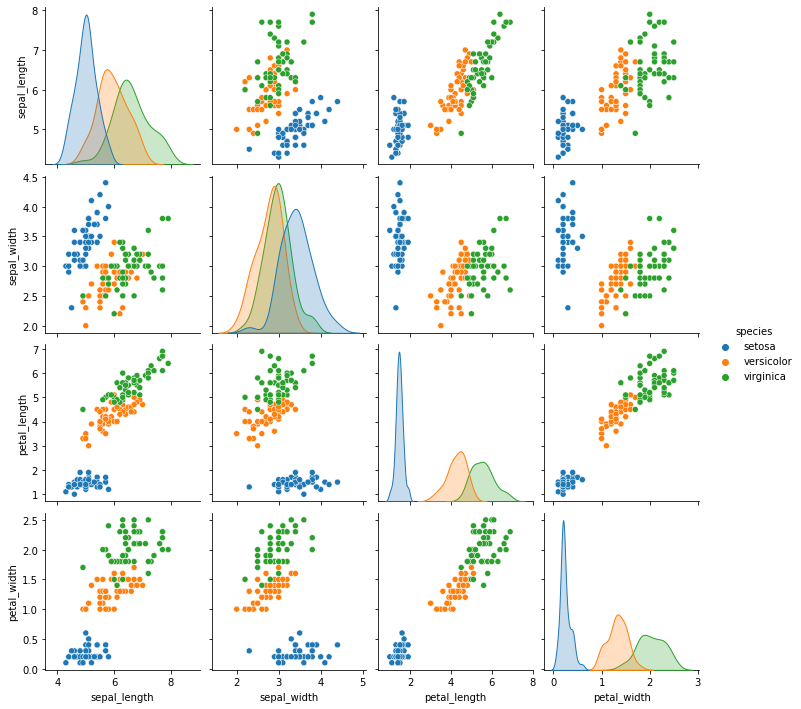

In [14]:
# Visualising the relation between features 
sns.pairplot(data=df,vars=['sepal_length','sepal_width','petal_length','petal_width'],hue='species')

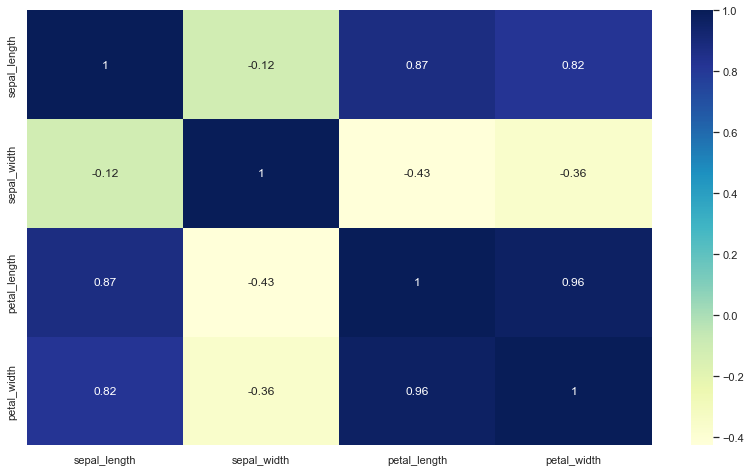

In [15]:
# Ploting the heatmap
plt.figure(figsize=(14,8))
sns.set_theme(style="dark")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt='.2g')#.2g is the decimal values

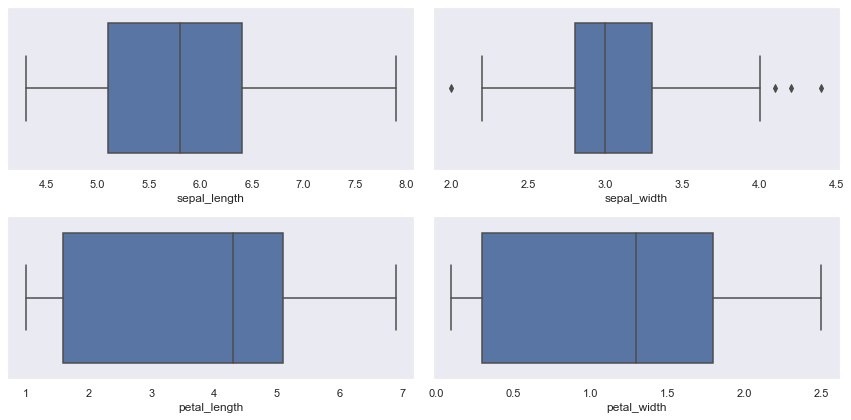

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
sns.boxplot(x=df.sepal_length, ax=axes[0,0])
sns.boxplot(x=df.sepal_width, ax=axes[0,1])
sns.boxplot(x=df.petal_length, ax=axes[1,0])
sns.boxplot(x=df.petal_width, ax=axes[1,1])
plt.tight_layout()

### Sepal_width has some outliers

In [17]:
# Treating the outliers with IQR method
df['sepal_width'].describe()

count    149.000000
mean       3.059732
std        0.436342
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [18]:
q3 = df["sepal_width"].quantile(0.75)  
q1 = df["sepal_width"].quantile(0.25)
print(q3)
print(q1)

3.3
2.8


In [19]:
IQR = q3 - q1
print(IQR)

0.5


In [20]:
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)

2.05


In [21]:
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

4.05


In [22]:
df_outliers = np.where(df["sepal_width"] > upper_limit, True, np.where(df["sepal_width"] < lower_limit, True, False))

In [23]:
df_without_outliers = df.loc[~(df_outliers)]

<AxesSubplot:ylabel='sepal_width'>

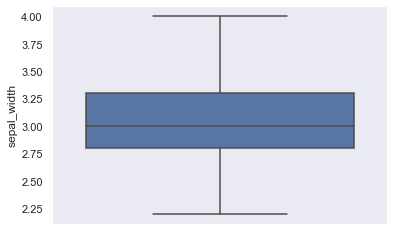

In [24]:
# Now the outlier is removed
sns.boxplot(y='sepal_width', data=df_without_outliers)

#### Building the Model

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# Segrigating the dependent and Independent features
X = df.iloc[:, 0:4]
y = df.iloc[:, -1:]

In [27]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y.head

<bound method NDFrame.head of        species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[149 rows x 1 columns]>

In [29]:
X.shape, y.shape

((149, 4), (149, 1))

In [30]:
# Encoding the labels
le = LabelEncoder()

In [31]:
y = le.fit_transform(y)

In [32]:
y.shape

(149,)

#### Splitting the dataset into trainig and test part

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [34]:
model = DecisionTreeClassifier()

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
model.score(X_train, y_train)

1.0

[Text(0.375, 0.9, 'X[2] <= 2.6\ngini = 0.664\nsamples = 99\nvalue = [36, 29, 34]\nclass = setosa'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'X[2] <= 4.85\ngini = 0.497\nsamples = 63\nvalue = [0, 29, 34]\nclass = setosa'),
 Text(0.25, 0.5, 'X[3] <= 1.6\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]\nclass = setosa'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = setosa'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = setosa'),
 Text(0.75, 0.5, 'X[3] <= 1.75\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = setosa'),
 Text(0.625, 0.3, 'X[3] <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = setosa'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = setosa'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = setosa'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]\nclass = setosa')]

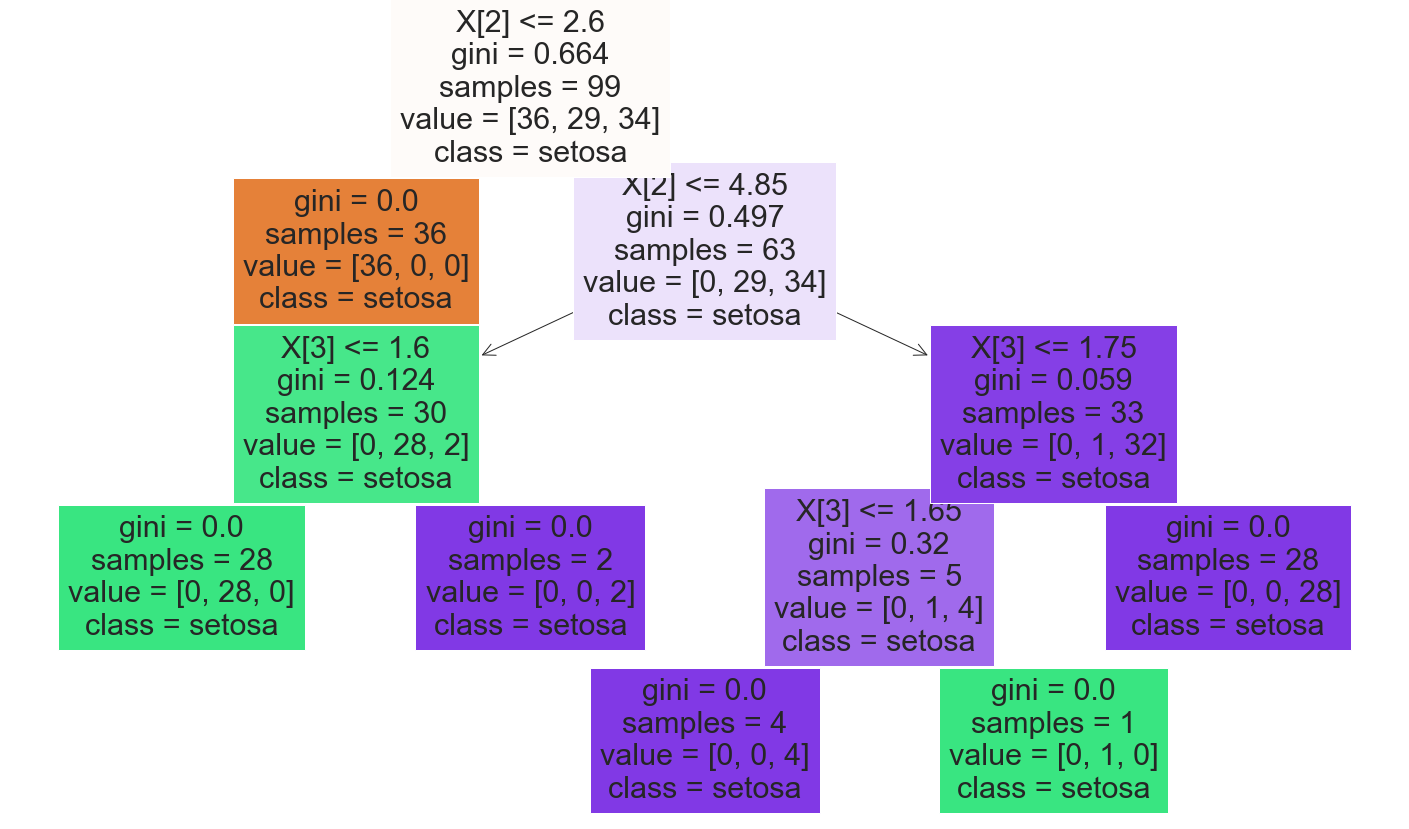

In [37]:
#Lets vizuallize the decision tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, filled=True, class_names=df["species"])

In [38]:
fig.savefig("decistion_tree_classifier.png")

In [39]:
y_predict = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_predict)

0.92

In [41]:
filename = 'decision_tree.pkl'
pickle.dump(model, open(filename, 'wb'))

In [42]:
dt_model = pickle.load(open(filename, 'rb'))

In [43]:
dt_model.predict([[5.1,3.5,1.4,0.2]])

array([0])

#### Printing the classification report

In [44]:
print(metrics.classification_report(y_test,y_predict))
print(metrics.confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.89        21
           2       0.79      1.00      0.88        15

    accuracy                           0.92        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.92      0.92        50

[[14  0  0]
 [ 0 17  4]
 [ 0  0 15]]


### As our model is over fitted we will tune it using grid search cv

In [45]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
}

In [46]:
grid_searh=GridSearchCV(estimator=model, param_grid=grid_param, cv=5, verbose=2)

In [47]:
grid_searh.fit(X_train, y_train)

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, 

[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=ra

[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=

[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitte

[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitte

[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitte

[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=ra

[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitte

[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=

[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitte

[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=

[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=6, splitte

[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=ra

[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=ra

[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitte

[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitte

[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitte

[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=ra

[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitte

[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=

[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitte

[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitte

[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=3, splitter=

[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=6, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=6, splitter=ra

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, m

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, m

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_s

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=5, m

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=7, m

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, m

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, m

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, m

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=7, m

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, m

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_s

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=4, m

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_s

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_s

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_s

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, m

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=6, min_s

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, min

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, m

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=6, m

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=7, min

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=1, min_s

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=4, m

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=5, min

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=6, min_s

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=2)

In [48]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'random'}

In [49]:
model_with_best_params = DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter='random')

In [50]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, splitter='random')

In [51]:
y_pred = model_with_best_params.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.92

[Text(0.3181818181818182, 0.9166666666666666, 'X[2] <= 1.752\ngini = 0.664\nsamples = 99\nvalue = [36, 29, 34]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4090909090909091, 0.75, 'X[3] <= 1.359\ngini = 0.512\nsamples = 64\nvalue = [1, 29, 34]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[3] <= 0.62\ngini = 0.095\nsamples = 20\nvalue = [1, 19, 0]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(0.6363636363636364, 0.5833333333333334, 'X[2] <= 4.804\ngini = 0.351\nsamples = 44\nvalue = [0, 10, 34]'),
 Text(0.45454545454545453, 0.4166666666666667, 'X[3] <= 1.639\ngini = 0.298\nsamples = 11\nvalue = [0, 9, 2]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.5454545454545454, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.818181818181

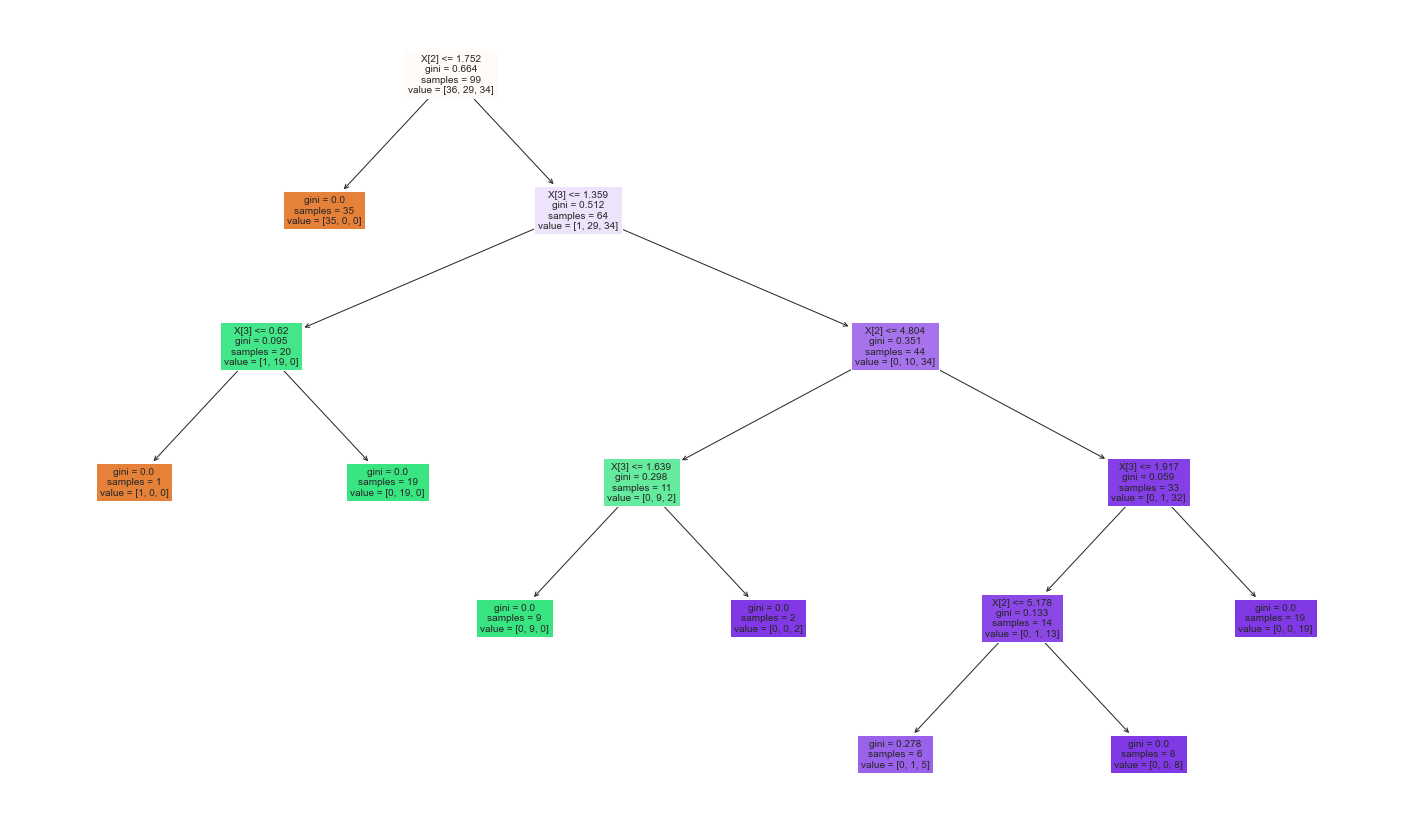

In [53]:
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params, filled=True, fontsize=10)